In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math
import warnings
warnings.filterwarnings('ignore')

## 1. Load file

In [2]:
pizza = pd.read_csv('Pizza.csv')

In [3]:
pizza.head()

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67


In [4]:
pizza.shape

(300, 9)

In [5]:
pizza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   brand   300 non-null    object 
 1   id      300 non-null    int64  
 2   mois    300 non-null    float64
 3   prot    300 non-null    float64
 4   fat     300 non-null    float64
 5   ash     300 non-null    float64
 6   sodium  300 non-null    float64
 7   carb    300 non-null    float64
 8   cal     300 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 21.2+ KB


In [6]:
pizza.isnull().sum()

brand     0
id        0
mois      0
prot      0
fat       0
ash       0
sodium    0
carb      0
cal       0
dtype: int64

In [7]:
pizza.describe()

,id,mois,prot,fat,ash,sodium,carb,cal
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,20841.040000,40.903067,13.373567,20.229533,2.633233,0.669400,22.864767,3.271000
std,6962.917222,9.552987,6.434392,8.975658,1.269724,0.370358,18.029722,0.620034
min,14003.000000,25.000000,6.980000,4.380000,1.170000,0.250000,0.510000,2.180000
25%,14093.750000,30.902500,8.060000,14.770000,1.450000,0.450000,3.467500,2.910000
50%,24020.500000,43.300000,10.440000,17.135000,2.225000,0.490000,23.245000,3.215000
75%,24110.250000,49.115000,20.022500,21.435000,3.592500,0.702500,41.337500,3.520000
max,34045.000000,57.220000,28.480000,47.200000,5.430000,1.790000,48.640000,5.080000


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoded_data = encoder.fit_transform(pizza['brand'])

In [9]:
pizza['encoded_brand'] = encoded_data
pizza

,brand,id,mois,prot,fat,ash,sodium,carb,cal,encoded_brand
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93,0
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84,0
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95,0
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74,0
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67,0
...,...,...,...,...,...,...,...,...,...,...
295,J,34044,44.91,11.07,17.00,2.49,0.66,25.36,2.91,9
296,J,24069,43.15,11.79,18.46,2.43,0.67,24.17,3.10,9
297,J,34039,44.55,11.01,16.03,2.43,0.64,25.98,2.92,9
298,J,14044,47.60,10.43,15.18,2.32,0.56,24.47,2.76,9


In [78]:
X = pizza[['mois','prot','fat','ash','sodium','carb','cal']]
y = pizza['encoded_brand']

In [79]:
X

,mois,prot,fat,ash,sodium,carb,cal
0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...
295,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,47.60,10.43,15.18,2.32,0.56,24.47,2.76


In [80]:
y

0      0
1      0
2      0
3      0
4      0
      ..
295    9
296    9
297    9
298    9
299    9
Name: encoded_brand, Length: 300, dtype: int32

## 2. Train_test_split

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.3,random_state=42,stratify=y)


## 3. Build Model

In [95]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

models = {
    'kNN' : KNeighborsClassifier(),
    'SVM': SVC(max_iter=10000),
    'RandomForestClassifier': RandomForestClassifier(),
    'DT': DecisionTreeClassifier(),
    'XGB':XGBClassifier()
}
params = { 
    'kNN' : {'n_neighbors': [3,5,7,9,11] , 'weights' : ['uniform','balanced']},
    'RandomForestClassifier': { 'n_estimators': [50,110,200,300,400,500],'class_weight':['balanced',None]},
    'SVM' : {'kernel':['linear', 'poly', 'rbf', 'sigmoid']},
    'DT' : {'criterion':['gini','Entropy'],'class_weight':['balanced',None]},
    'XGB': {'learning_rate':[0.05,0.2,0.5,0.7,0.9], 'n_estimators': [50,200,300,400,500]},
}

In [96]:
from HyperclassifierSearch import HyperclassifierSearch
search = HyperclassifierSearch(models, params)
best_model = search.train_model(X_train, y_train, cv=5)

Search for kNN ...
Search for SVM ...
Search for RandomForestClassifier ...
Search for DT ...
Search for XGB ...
Search is done.


results round for: kNN
results round for: SVM
results round for: RandomForestClassifier
results round for: DT
results round for: XGB


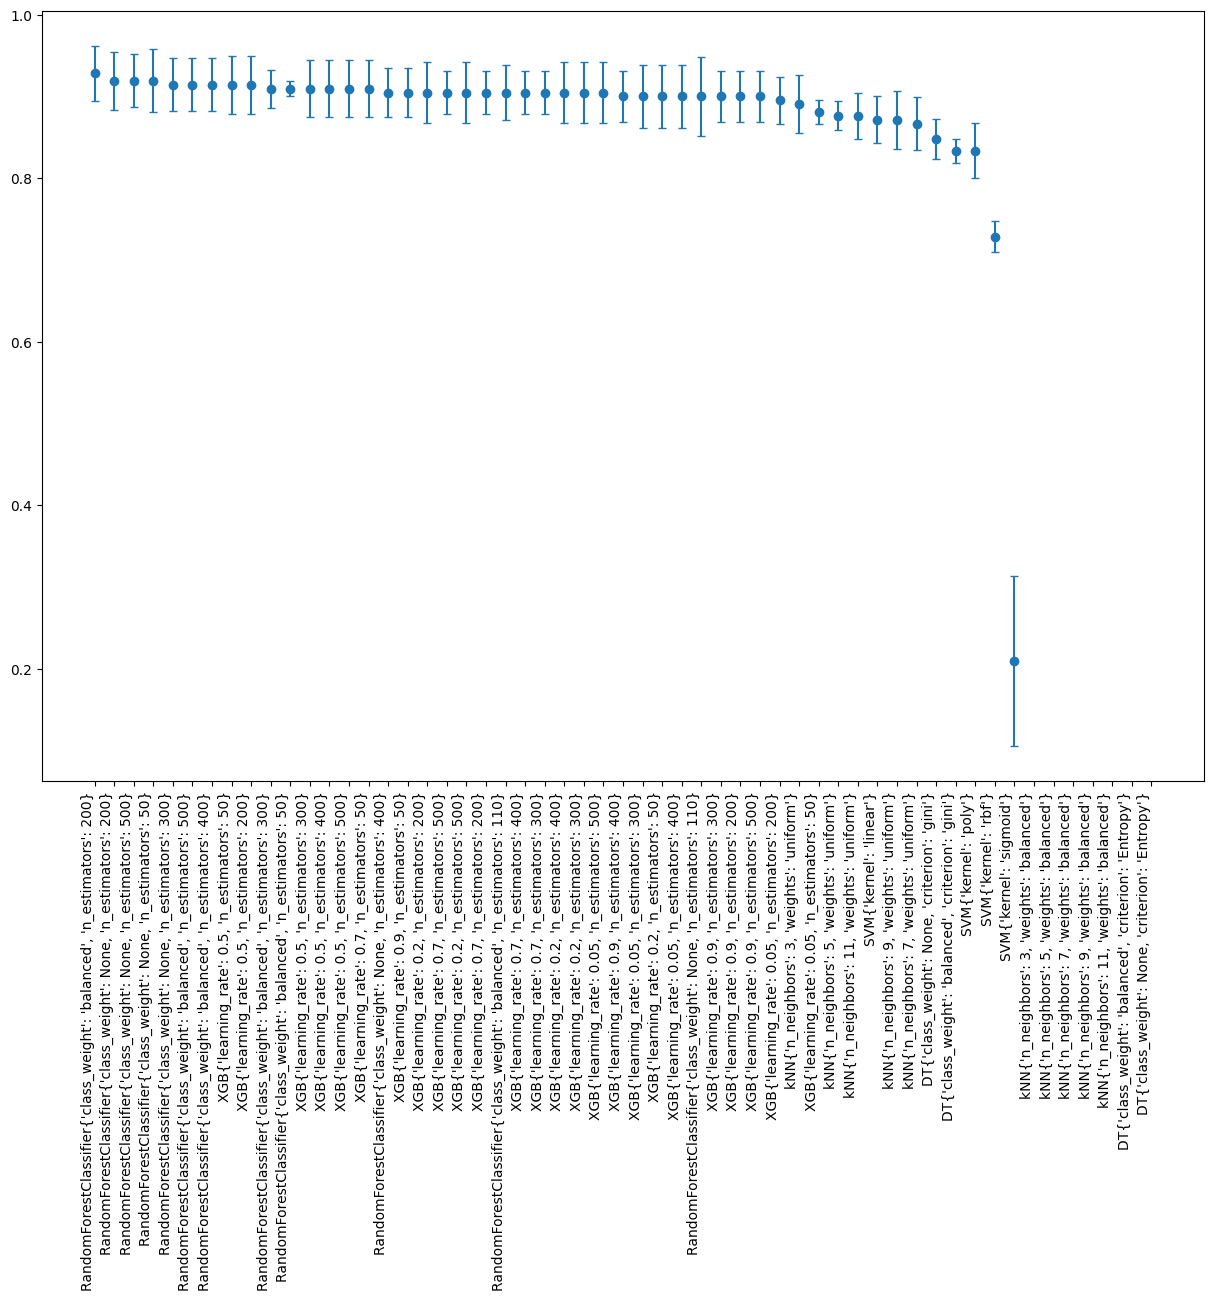

In [97]:
from matplotlib import pyplot as plt
result = search.evaluate_model()
result['label'] = result['Estimator'].astype(str) + result['params'].astype(str)
std = result['std_test_score'].to_list()
mean_ = result['mean_test_score'].to_list()
x = result['label'].to_list()
plt.figure(figsize=(15,10))
plt.errorbar(x, mean_, std, linestyle='None', marker='o',capsize=3)
plt.xticks(rotation=90, ha='right')
plt.show()

- Chọn mô hình tốt nhất từ (2) để fit trên tập Train và dự đoán trên tập test

In [104]:
print('Best Score: %s' % best_model.best_score_)
print('Best Hyperparameters: %s' % best_model.best_params_)

Best Score: 0.9285714285714286
Best Hyperparameters: {'class_weight': 'balanced', 'n_estimators': 200}


In [87]:
best_model

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', None],
                         'n_estimators': [50, 110, 200, 300, 400, 500]})

## => RandomForestClassifier có độ chính xác tốt nhất

In [88]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [102]:
y_predict = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
accuracy

0.9

In [103]:
print(classification_report(y_test,y_predict,digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000         9
           1     1.0000    1.0000    1.0000         9
           2     0.8889    1.0000    0.9412         8
           3     1.0000    0.9000    0.9474        10
           4     0.6667    0.5000    0.5714         8
           5     1.0000    0.7778    0.8750         9
           6     0.8182    1.0000    0.9000         9
           7     0.6667    0.8000    0.7273        10
           8     1.0000    1.0000    1.0000         9
           9     1.0000    1.0000    1.0000         9

    accuracy                         0.9000        90
   macro avg     0.9040    0.8978    0.8962        90
weighted avg     0.9053    0.9000    0.8980        90



- Nhận xét: Mô hình có độ chính xác cao

## Boosting

### AdaBoostClassifier

In [119]:
from sklearn.ensemble import AdaBoostClassifier


In [120]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)

In [121]:
clf.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [122]:
preds = clf.predict(X_test)
print(report(y_test,preds,digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000         9
           1     0.0000    0.0000    0.0000         9
           2     0.0000    0.0000    0.0000         8
           3     0.5556    1.0000    0.7143        10
           4     0.0000    0.0000    0.0000         8
           5     0.0000    0.0000    0.0000         9
           6     0.0000    0.0000    0.0000         9
           7     0.2778    1.0000    0.4348        10
           8     1.0000    1.0000    1.0000         9
           9     0.5000    1.0000    0.6667         9

    accuracy                         0.5222        90
   macro avg     0.3333    0.5000    0.3816        90
weighted avg     0.3426    0.5222    0.3943        90



In [123]:
accuracy = accuracy_score(y_test, preds)
accuracy

0.5222222222222223

### Xgboost

In [124]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.2, n_estimators=100, objective='binary:logistic',
                     nthread=1)

In [125]:
xgb.fit(X_train,y_train)
preds = xgb.predict(X_test)
print(classification_report(y_test,preds,digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000         9
           1     1.0000    1.0000    1.0000         9
           2     0.8889    1.0000    0.9412         8
           3     1.0000    0.9000    0.9474        10
           4     0.5556    0.6250    0.5882         8
           5     0.8750    0.7778    0.8235         9
           6     0.8000    0.8889    0.8421         9
           7     0.6667    0.6000    0.6316        10
           8     1.0000    1.0000    1.0000         9
           9     1.0000    1.0000    1.0000         9

    accuracy                         0.8778        90
   macro avg     0.8786    0.8792    0.8774        90
weighted avg     0.8811    0.8778    0.8779        90



In [126]:
accuracy = accuracy_score(y_test, preds)
accuracy

0.8777777777777778

Nhận xét: 
- AdaBoost có độ chính xác rất thấp
- Trong khi đó Xgboost có độ chính xác cao, gần bằng với RandomForest